#!pip install feature_engine

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [28]:
df = pd.read_csv("Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [29]:
df.shape

(3547, 11)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [31]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [32]:
# DUPLICATE ROWS
df.duplicated().sum()

np.int64(0)

In [33]:
# Finding Missing Values
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [34]:
# OUTLIERS
num_col = df.select_dtypes(include = [np.number]).columns
for col in num_col:
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower = df[col].quantile(0.25) - (1.5 * iqr)
    upper = df[col].quantile(0.75) + (1.5 * iqr)
    outliers = np.where(df[col] > upper, True, np.where(df[col] < lower, True, False))
    print(f"outliers in {col}: {outliers.sum()}")
                                                       

outliers in hour_of_day: 0
outliers in money: 0
outliers in Weekdaysort: 0
outliers in Monthsort: 0


# **Sales by Hour of day**

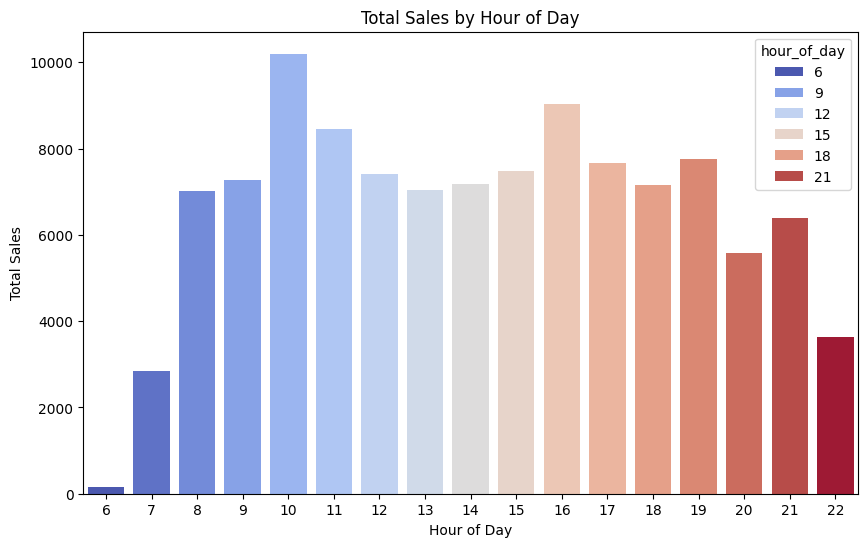

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x="hour_of_day", y="money", hue="hour_of_day", data=df, estimator=sum, errorbar=None, palette="coolwarm")
plt.title("Total Sales by Hour of Day")
plt.ylabel("Total Sales")
plt.xlabel("Hour of Day")
plt.show()

# **Sales by Coffee Type**

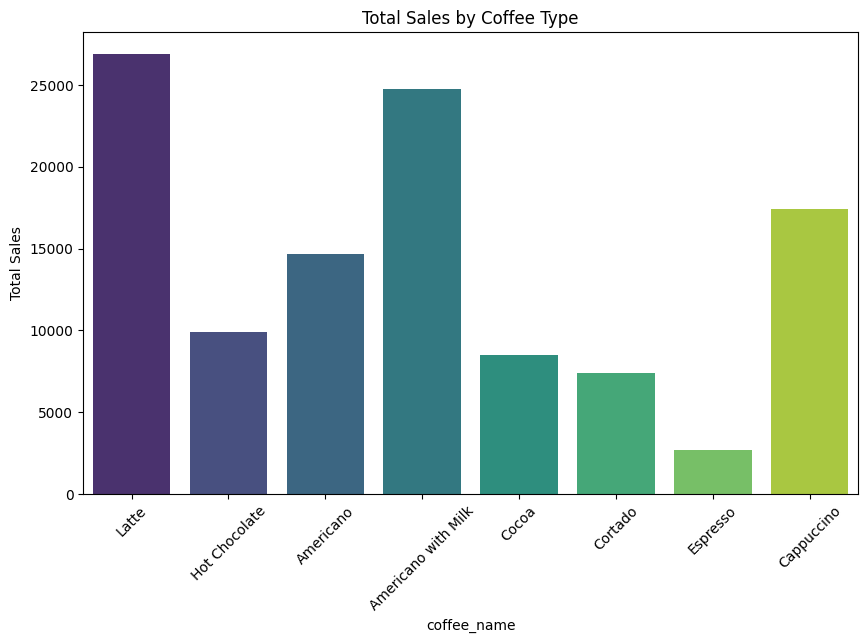

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x="coffee_name", y="money",hue="coffee_name", data=df, estimator=sum, errorbar=None, palette="viridis")
plt.title("Total Sales by Coffee Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# **Sales by Cash Type**

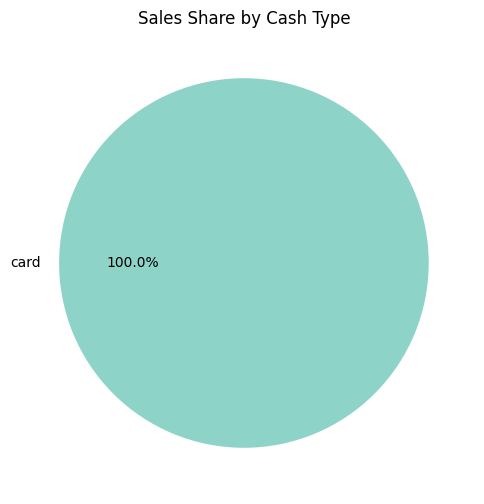

In [37]:
plt.figure(figsize=(6,6))
df.groupby("cash_type")["money"].sum().plot(kind="pie", autopct="%.1f%%", cmap="Set3")
plt.ylabel("")
plt.title("Sales Share by Cash Type")
plt.show()


# **Sales by Day of Week**

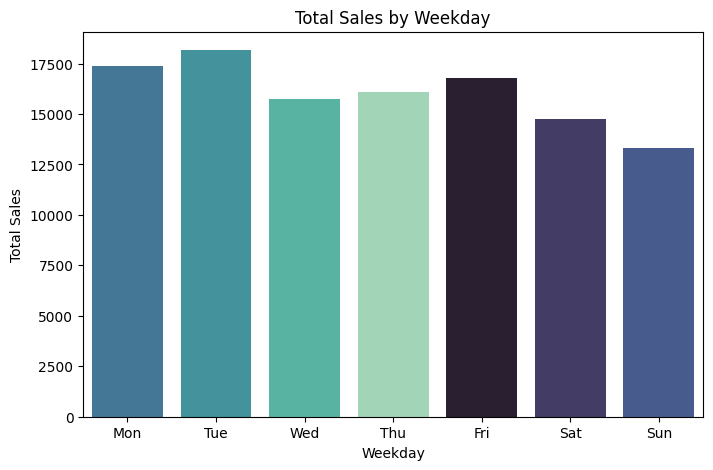

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x="Weekday", y="money",hue="Weekday", data=df, estimator=sum, errorbar=None, order=df.sort_values("Weekdaysort")["Weekday"].unique(), palette="mako")
plt.title("Total Sales by Weekday")
plt.ylabel("Total Sales")
plt.show()

# **Monthly Sales Trend**

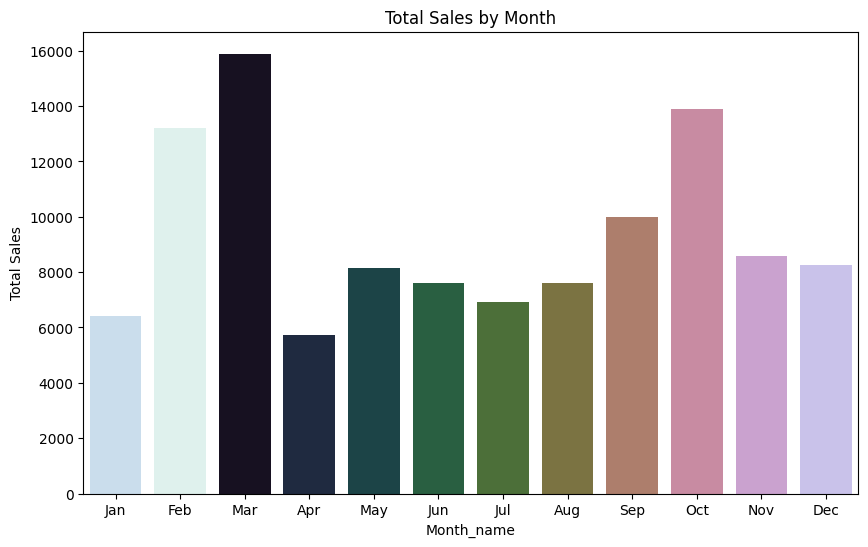

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x="Month_name", y="money",hue="Month_name", data=df, estimator=sum, errorbar=None,
            order=df.sort_values("Monthsort")["Month_name"].unique(), palette="cubehelix")
plt.title("Total Sales by Month")
plt.ylabel("Total Sales")
plt.show()

# **Time of Day Analysis (Morning/Afternoon/Evening/Night)**

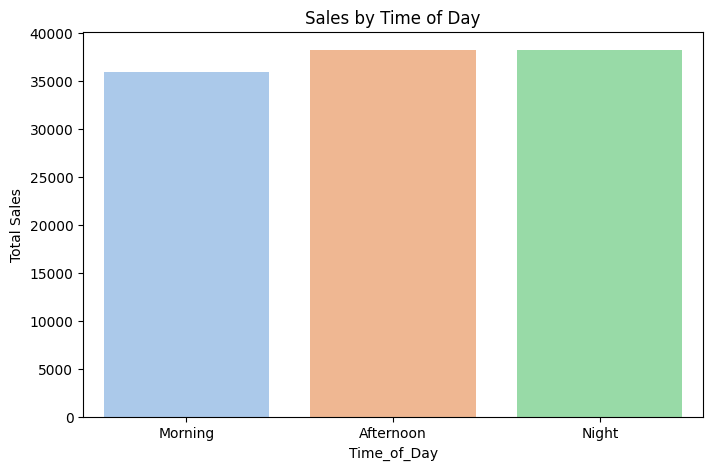

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x="Time_of_Day", y="money",hue="Time_of_Day", data=df, estimator=sum, errorbar=None, palette="pastel")
plt.title("Sales by Time of Day")
plt.ylabel("Total Sales")
plt.show()

In [41]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year

In [42]:
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute
df["Second"] = df["Time"].dt.second

df.drop(columns=["Time"], inplace=True)

df.head()

C:\Users\andi\AppData\Local\Temp\ipykernel_6732\254756950.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"], errors="coerce")


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Day,Year,Hour,Minute,Second
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,1,2024,10,15,50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,1,2024,12,19,22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,1,2024,12,20,18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,1,2024,13,46,33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,1,2024,13,48,14


**ENCODING CATEGORICAL VARIABLES**

In [43]:
df_1 = pd.get_dummies(df, columns=["cash_type", "coffee_name", "Time_of_Day", "Weekday", "Month_name"], drop_first=True)

In [44]:
df_1.head()

,hour_of_day,money,Weekdaysort,Monthsort,Date,Day,Year,Hour,Minute,Second,...,Month_name_Dec,Month_name_Feb,Month_name_Jan,Month_name_Jul,Month_name_Jun,Month_name_Mar,Month_name_May,Month_name_Nov,Month_name_Oct,Month_name_Sep
0,10,38.7,5,3,2024-03-01,1,2024,10,15,50,...,False,False,False,False,False,True,False,False,False,False
1,12,38.7,5,3,2024-03-01,1,2024,12,19,22,...,False,False,False,False,False,True,False,False,False,False
2,12,38.7,5,3,2024-03-01,1,2024,12,20,18,...,False,False,False,False,False,True,False,False,False,False
3,13,28.9,5,3,2024-03-01,1,2024,13,46,33,...,False,False,False,False,False,True,False,False,False,False
4,13,38.7,5,3,2024-03-01,1,2024,13,48,14,...,False,False,False,False,False,True,False,False,False,False


In [45]:
X = df_1.drop(["money", "Date"], axis=1)
y = df_1["money"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name)
    print("RMSE:", mean_squared_error(y_test, preds))
    print("R2 Score:", r2_score(y_test, preds))
    print("-"*30)


Linear Regression
RMSE: 0.2500256101166022
R2 Score: 0.9890707279067064
------------------------------
Random Forest
RMSE: 0.107188485521126
R2 Score: 0.9953145114895146
------------------------------
XGBoost
RMSE: 0.0885156870022374
R2 Score: 0.9961307482568641
------------------------------


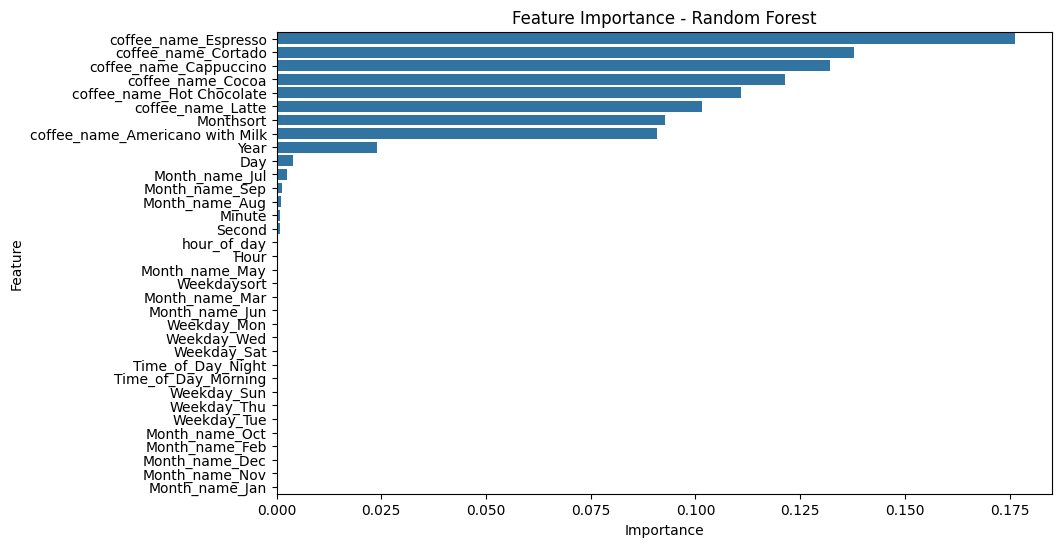

In [48]:
rf_model = models["Random Forest"].fit(X_train, y_train)
importances = rf_model.feature_importances_

feat_imp = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()

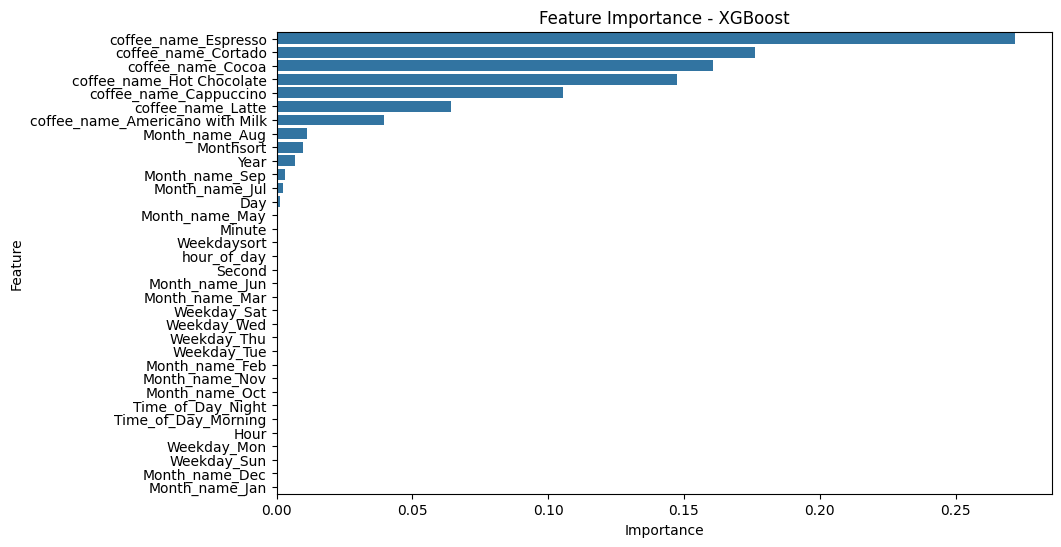

In [49]:
rf_model = models["XGBoost"].fit(X_train, y_train)
importances = rf_model.feature_importances_

feat_imp = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - XGBoost")
plt.show()

In [50]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(
    rf, param_grid, n_iter=10, cv=3, scoring="r2", random_state=42, n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Score: 0.9929885220357768


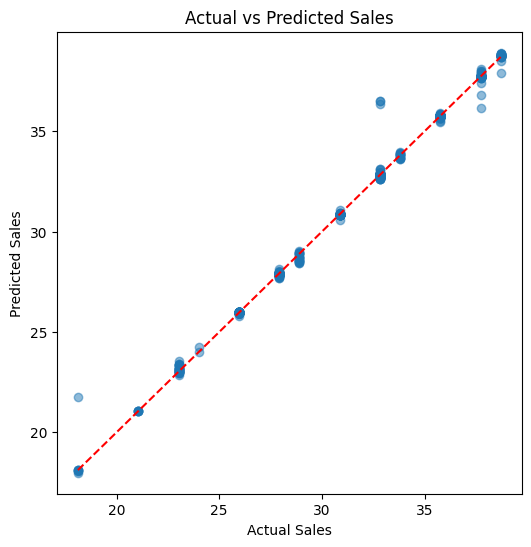

In [51]:
best_model = rf_model  # replace with tuned model

y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


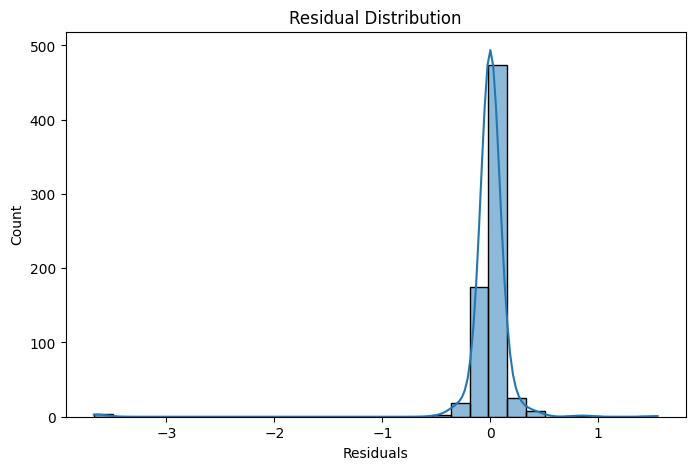

In [52]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()
